In [11]:
import gzip
import os
from os.path import isfile, join
import numpy as np

In [12]:
mnist_path = "./mnist_raw/"

In [14]:
def list_files(mnist_path):
    return [join(mnist_path, f) for f in os.listdir(mnist_path) if isfile(join(mnist_path, f)) ] 

In [15]:
for f in list_files(mnist_path): print(f)

./mnist_raw/t10k-images-idx3-ubyte.gz
./mnist_raw/t10k-labels-idx1-ubyte.gz
./mnist_raw/train-images-idx3-ubyte.gz
./mnist_raw/train-labels-idx1-ubyte.gz


In [16]:
def get_images(mnist_path):
    for f in list_files(mnist_path):
        if 'train-images' in f:
            with gzip.open(f, 'rb') as data:
                _ = int.from_bytes(data.read(4), 'big')
                num_images = int.from_bytes(data.read(4), 'big')
                rows = int.from_bytes(data.read(4), 'big')
                cols = int.from_bytes(data.read(4), 'big')
                train_images = data.read()
                x_train = np.frombuffer(train_images, dtype=np.uint8)
                x_train = x_train.reshape((num_images, rows, cols))
        elif 'train-labels' in f:
            with gzip.open(f, 'rb') as data:
                train_labels = data.read()[8:]
                y_train = np.frombuffer(train_labels, dtype=np.uint8)
        if 't10k-images' in f:
            with gzip.open(f, 'rb') as data:
                _ = int.from_bytes(data.read(4), 'big')
                num_images = int.from_bytes(data.read(4), 'big')
                rows = int.from_bytes(data.read(4), 'big')
                cols = int.from_bytes(data.read(4), 'big')
                test_images = data.read()
                x_test = np.frombuffer(test_images, dtype=np.uint8)
                x_test = x_test.reshape((num_images, rows, cols))
        elif 't10k-labels' in f:
            with gzip.open(f, 'rb') as data:
                test_labels = data.read()[8:]
                y_test = np.frombuffer(test_labels, dtype=np.uint8)
    return x_train, y_train, x_test, y_test
                

In [17]:
x_train, y_train, x_test, y_test = get_images(mnist_path)

In [18]:
print(x_train.shape)

(60000, 28, 28)


In [19]:
print(y_train.shape)

(60000,)


In [20]:
print(x_test.shape)

(10000, 28, 28)


In [21]:
print(y_test.shape)

(10000,)


In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

In [9]:
def plot_number(image):
    plt.imshow(image.squeeze(), cmap=plt.get_cmap('gray'))
    plt.axis('off')

 La imagen mostrada corresponde a un: 4


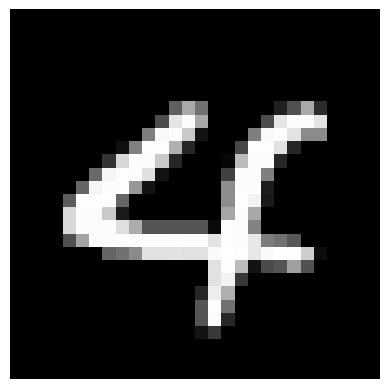

In [24]:
rand_idx = np.random.randint(len(y_test))
print(f' La imagen mostrada corresponde a un: {y_test[rand_idx]}')
plot_number(x_test[rand_idx])